## Test the energy conservation between pupil and focal plane
With astropy.unit to get the right units <3

<pupil>
  * field_size : 256 (px)
  * scale : 64.0 pix / m (px/m)
  * aperture_size : 1.0 m (m)


Irradiance I before pupil, set by the user as an attribute of the initial field : 9e-11 W / m2

Integrated flux calculated after pupil on the field's complex amplitude 7.092773437499998e-11 W
Integrated flux calculated from the physical values : I x π x (D/2)² 7.068583470577034e-11 W

adu adu


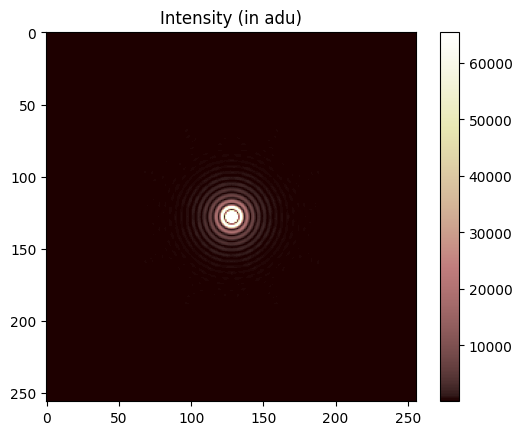

Integrated flux @ camera : 7.0927734375e-11 W


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from fiatlux.field import Field
from fiatlux.pupil import Pupil
from fiatlux.detector import Detector
from fiatlux.propagator import Propagator

import astropy.units as u
import astropy.constants as C

N = 256
D = 1
f = Field(N, irradiance=9e-11)
pupil = Pupil(
    field_size=N, aperture_shape="circular", aperture_size=D,
)
camera = Detector(
    field_size=N,
    display_intensity=True,
    exposure_time=0.15,
    noise=True,
    quantum_efficiency=0.67,
    variance_dark_noise=2,
    bitdepth=16,
)

print("\n")

print(
    f"Irradiance I before pupil, set by the user as an attribute of the initial field : {f.irradiance}\n"
)

# Going through the pupil
f * pupil

print(
    f"Integrated flux calculated after pupil on the field's complex amplitude {np.sum(np.abs(f.complex_amplitude)**2)*u.pixel**2}"
)
print(
    f"Integrated flux calculated from the physical values : I x π x (D/2)² {f.irradiance*np.pi*(pupil._aperture_size/2)**2}\n"
)

# Propagation to the camera
f > camera

print(
    f"Integrated flux @ camera : {np.sum(np.abs(camera.complex_amplitude)**2)*u.pixel**2}"
)